Kickstarter 

In [1]:
import pandas as pd


In [2]:
kick=pd.read_csv("kickstarter.csv")
kick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
project id           45957 non-null int64
name                 45957 non-null object
url                  45957 non-null object
category             45957 non-null object
subcategory          45957 non-null object
location             44635 non-null object
status               45957 non-null object
goal                 45957 non-null float64
pledged              45945 non-null float64
funded percentage    45957 non-null float64
backers              45957 non-null int64
funded date          45957 non-null object
levels               45957 non-null int64
reward levels        45898 non-null object
updates              45957 non-null int64
comments             45957 non-null int64
duration             45957 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 6.0+ MB


In [3]:
print(kick[:0])

Empty DataFrame
Columns: [project id, name, url, category, subcategory, location, status, goal, pledged, funded percentage, backers, funded date, levels, reward levels, updates, comments, duration]
Index: []


In [4]:
#Cleanup headers
kick.rename(columns={"project id":"proID", 
                     'funded percentage': 'perc_funded',
                     'funded date':'fund_date',
                     'reward levels':'reward_level'},inplace=True)

In [5]:
kick.columns

Index(['proID', 'name', 'url', 'category', 'subcategory', 'location', 'status',
       'goal', 'pledged', 'perc_funded', 'backers', 'fund_date', 'levels',
       'reward_level', 'updates', 'comments', 'duration'],
      dtype='object')

In [6]:
kick.head()

,proID,name,url,category,subcategory,location,status,goal,pledged,perc_funded,backers,fund_date,levels,reward_level,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [7]:
#all LOWERCASE

kick['name']=kick['name'].str.lower()
kick['category']=kick['category'].str.lower()
kick['location']=kick['location'].str.lower()
kick.head()

,proID,name,url,category,subcategory,location,status,goal,pledged,perc_funded,backers,fund_date,levels,reward_level,updates,comments,duration
0,39409,while the trees sleep,http://www.kickstarter.com/projects/emiliesaba...,film & video,Short Film,"columbia, mo",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,educational online trading card game,http://www.kickstarter.com/projects/972789543/...,games,Board & Card Games,"maplewood, nj",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,strum,http://www.kickstarter.com/projects/185476022/...,film & video,Animation,"los angeles, ca",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,getting over - one son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,film & video,Documentary,"los angeles, ca",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,the launch of flyegrlroyalty &quot;the new nam...,http://www.kickstarter.com/projects/flyegrlroy...,fashion,Fashion,"novi, mi",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00


In [87]:
#remove CHARACTERS

def clean_name(name):
    name = name.replace(',',' ')
    name = name.replace('&quot;',' ')
    name = name.replace('/',' ')
    name = name.replace('--',' ')
    name = name.replace('(',' ')
    name = name.replace(')',' ')
    name = name.replace('.',' ')
    name = name.replace('-','')
    name = name.replace(':','')
    name = name.replace('[',' ')
    name = name.replace(']',' ')
    name = name.replace(';','')
    name = name.replace('.','')
    name = name.replace('!','')
#   name = name.replace('\\'','')
    name = name.replace('#','No ')
    name = name.replace('|','')
    name = name.replace('����_΢ ',' ')
    name = name.replace('',' ')
    name = name.replace('',' ')
    


In [97]:
kick['category'].unique()

array(['film & video', 'games', 'fashion', 'music', 'art', 'technology',
       'dance', 'publishing', 'theater', 'comics', 'design',
       'photography', 'food', 'film &amp; video'], dtype=object)

In [98]:
kick['category'] = kick['category'].str.replace('film &amp; video','film & video')
kick['category'].unique()

array(['film & video', 'games', 'fashion', 'music', 'art', 'technology',
       'dance', 'publishing', 'theater', 'comics', 'design',
       'photography', 'food'], dtype=object)

In [101]:
kick['subcategory'].unique()

array(['Short Film', 'Board & Card Games', 'Animation', 'Documentary',
       'Fashion', 'Music', 'Illustration', 'Film &amp; Video',
       'Open Software', 'Indie Rock', 'Dance', 'Fiction', 'Nonfiction',
       'Theater', 'Games', 'Art Book', 'Country & Folk', 'Comics',
       'Webseries', 'Technology', 'Performance Art', 'Narrative Film',
       'Video Games', 'Product Design', 'Rock', 'Painting', 'Photography',
       'Conceptual Art', 'Jazz', 'Open Hardware', 'Classical Music',
       'Food', 'Art', 'Pop', 'Journalism', 'Poetry', 'Electronic Music',
       'World Music', 'Sculpture', 'Publishing', "Children's Book",
       'Public Art', 'Mixed Media', 'Graphic Design', 'Hip-Hop',
       'Periodical', 'Crafts', 'Design', 'Digital Art',
       'Board &amp; Card Games', 'Country &amp; Folk'], dtype=object)

In [102]:
kick['subcategory'] = kick['subcategory'].str.replace('Film &amp; Video','Film & Video')
kick['subcategory'] = kick['subcategory'].str.replace('Country &amp; Folk','Country & Folk')
kick['subcategory'] = kick['subcategory'].str.replace('Board &amp; Card Games','Board & Card Games')
kick['subcategory'].unique()

array(['Short Film', 'Board & Card Games', 'Animation', 'Documentary',
       'Fashion', 'Music', 'Illustration', 'Film & Video',
       'Open Software', 'Indie Rock', 'Dance', 'Fiction', 'Nonfiction',
       'Theater', 'Games', 'Art Book', 'Country & Folk', 'Comics',
       'Webseries', 'Technology', 'Performance Art', 'Narrative Film',
       'Video Games', 'Product Design', 'Rock', 'Painting', 'Photography',
       'Conceptual Art', 'Jazz', 'Open Hardware', 'Classical Music',
       'Food', 'Art', 'Pop', 'Journalism', 'Poetry', 'Electronic Music',
       'World Music', 'Sculpture', 'Publishing', "Children's Book",
       'Public Art', 'Mixed Media', 'Graphic Design', 'Hip-Hop',
       'Periodical', 'Crafts', 'Design', 'Digital Art'], dtype=object)

In [88]:
kick.head()

,proID,name,url,category,subcategory,location,status,goal,pledged,perc_funded,backers,fund_date,levels,reward_level,updates,comments,duration,day,month
0,39409,while the trees sleep,http://www.kickstarter.com/projects/emiliesaba...,film & video,Short Film,"columbia, mo",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,Fri,Aug
1,126581,educational online trading card game,http://www.kickstarter.com/projects/972789543/...,games,Board & Card Games,"maplewood, nj",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,Mon,Aug
2,138119,strum,http://www.kickstarter.com/projects/185476022/...,film & video,Animation,"los angeles, ca",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,Fri,Jun
3,237090,getting over - one son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,film & video,Documentary,"los angeles, ca",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,Sun,Apr
4,246101,the launch of flyegrlroyalty &quot;the new nam...,http://www.kickstarter.com/projects/flyegrlroy...,fashion,Fashion,"novi, mi",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,Wed,Jun


In [10]:
sum_num = kick['backers'].mean()
sum_num = int(sum_num)

print(f"The average is: ", sum_num)


The average is:  4980


In [52]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

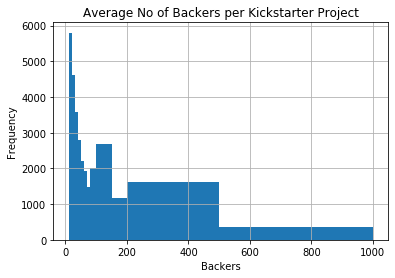

In [54]:
bin_edges = [10,20,30,40,50,60,70,80,100,150,200,500,1000]
hist=kick["backers"].hist(bins=bin_edges)
hist.set_title('Average No of Backers per Kickstarter Project')
hist.set_xlabel('Backers')
hist.set_ylabel('Frequency')
plt.show()

In [56]:
import numpy as np

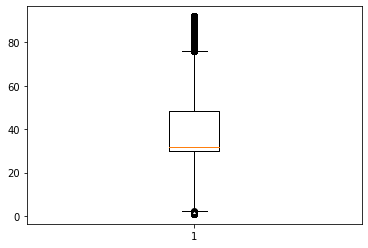

In [68]:
plt.boxplot(kick['duration'])
plt.show()

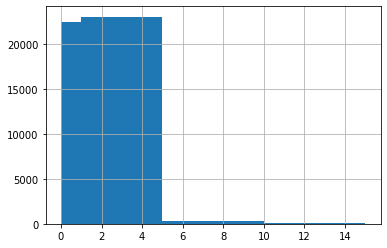

In [77]:
p_bin_edges=[0.000,1,5,10,15]
Perc_hist = kick["perc_funded"].hist(bins=p_bin_edges)
plt.show()

In [99]:
kick['day'] = kick["fund_date"].str.slice(stop=3)
kick['month'] = kick['fund_date'].str.slice(start=8,stop=11)

In [103]:
kick.head()
kick.to_csv('kick_append.csv')